# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
# 파싱 가능
data['datetime'] = data['datetime'].astype('datetime64')

In [6]:
data['year'] = data['datetime'].dt.year 
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

### <귀무 가설>
1. 바람이 많이 불 때 적게 탈 것
2. 습도가 많을 때 이용량이 적을 것
3. 온도가 높을 때 이용량이 적을 것
4. 여름에 이용량이 적을 것

## 가설 검정 1

- 바람이 많이 불 때 이용량이 적을 것

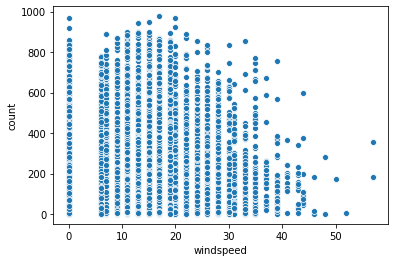

In [7]:
sns.scatterplot(x='windspeed', y="count", data = data)

풍속이 세질 수록 빌리는 빈도가 줄어듦을 확인 수 있음. 이는 Y축 데이터의 (-) 기울기로 확인

## 평가
풍속에 따른 사용량의 감소가 비교적 뚜렷한 것으로 보임. 가설 2를 기각하지 않음

## 가설 검정2

- 습도가 많을 때 적게 탈 것

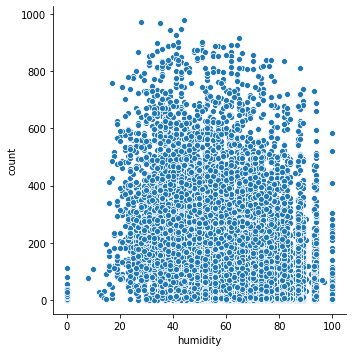

In [8]:
sns.relplot(x='humidity', y="count", data = data)

습도가 높아질 수록 상위 값에서 감소하는 추세 

## 평가 

-  습도가 높을 수록 사용량이 감소하는 추세를 보임. 가설을 기각하지 않음

## 가설 검정 3

- 온도가 높을 때 적게 탈 것

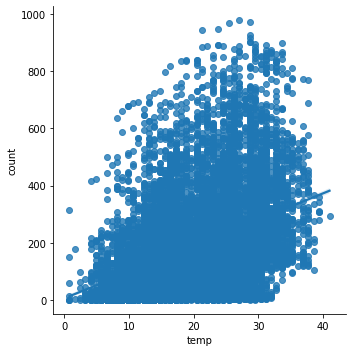

In [9]:
sns.lmplot(x='temp', y="count", data = data)

온도가 올라갈 수록 오히려 사용량 증가하는 추세.
단, 온도의 정의를 추상적으로 잡은 문제. 
보다 세분화된 분석이 요구됨

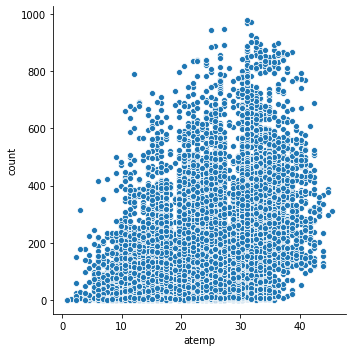

In [10]:
sns.relplot(x='atemp', y="count", data = data)

atemp와 temp를 비교할 경우, 
전체적인 데이터 양상에서 차이는 없지만 19도 및 27도 구간에서 큰 차이를 보임

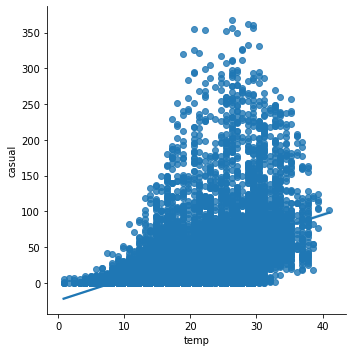

In [22]:
sns.lmplot(x='temp', y="casual", data = data)

온도가 올라갈 수록 사용량 급속하게 증가하는 추세

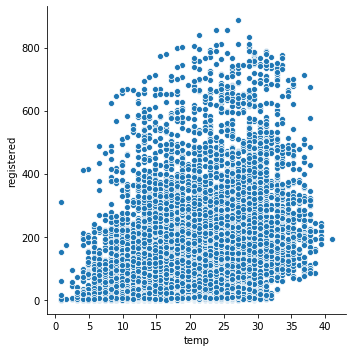

In [12]:
sns.relplot(x='temp', y="registered", data = data)

등록자 역시 온도가 올라갈 수록 사용량이 미약하게 올라가는 추세를 보이긴 하나, 비등록자에 비해 눈에 띄지 않음. 가설 3의 기각에 비등록자의 경향성이 큰 영향을 미쳤을 것으로 추정

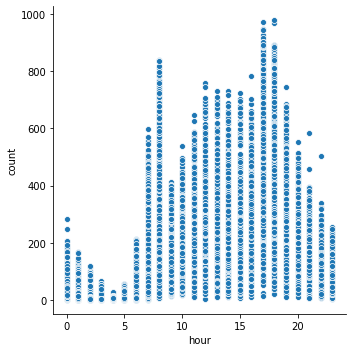

In [13]:
sns.relplot(x='hour', y="count", data = data)

자외선이 비교적 강한 시간인 12~16시 구간 사용도가 비교적 높지 않음을 볼 수 있음. 기온이 높은 구간(날씨가 좋음)의 사용대와 별도로 하루 중 자외선이 강한 시간은 피하는 것으로 보임.
단, 아침 저녁 시간을 여가 이용시간에서 배제했을 경우에만 타당할 것(전체 데이터에서 12 ~16 구간의 사용량이 낮다고는 볼 수 없음)

08시 구간에 비교적 높은 사용량이 보이는데, 출근 혹은 등교용으로 이용한 사람들의 데이터인지 별도의 분석 필요.

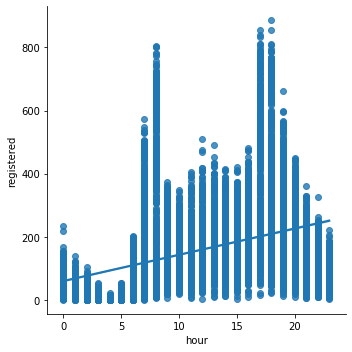

In [27]:
sns.lmplot(x='hour', y="registered", data = data)

위의 결과에서 08시 구간 사용량은 registered의 사용량이 높으며, 이는 출근 혹은 등교용 사용량에 기반한 것으로 보인다.

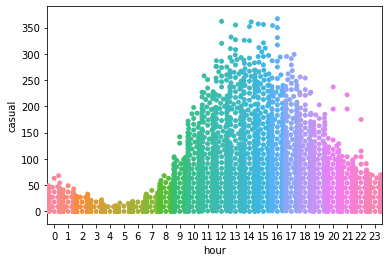

In [30]:
sns.swarmplot(x='hour', y="casual", data = data)

위의 결과에서 08시 구간 사용량은 registered의 사용량과 크게 대비된다.
따라서 온도가 높은 날(화창함)에 비교적 사용인구가 늘어나지만, 하루 중 자외선이 강한 시간대를 피하는 경향성을 보이며, 08시 구간과 같은 이상 구간이 관측됨. 

### 평가 
- 온도의 재정의에 따라 기온이 높을 경우 비교적 자전거 이용량이 적은 추세를 보임, 가설 기각 X

## 가설 검정 4

- 겨울에 사용량이 적을 것

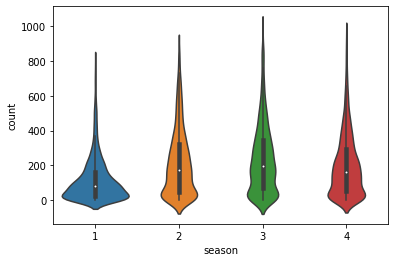

In [29]:
sns.violinplot(x='season', y="count", data = data)

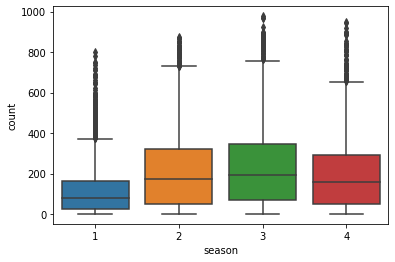

In [17]:
sns.boxplot(x='season', y="count", data = data)

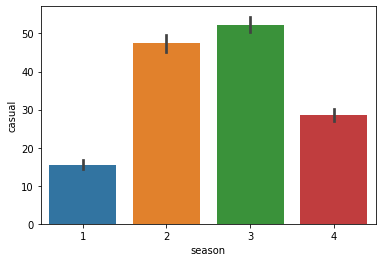

In [18]:
sns.barplot(x='season', y="casual", data = data)

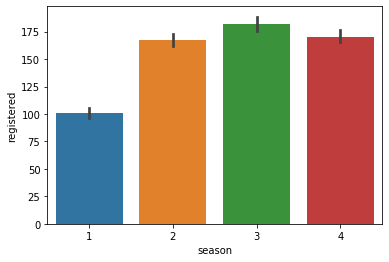

In [19]:
sns.barplot(x='season', y="registered", data = data)

- 겨울 사용량이 크게 유의미한 차이를 보이지 않아서 다시 사용자를 정기 및 비정기 이용자로 구분해봄

- 이 경우 registered에 비해 casual 수치가 큰 폭으로 떨어지는 결과 도출
- 겨울 이용량의 낙폭이 크지 않은 것으로 보아 registered의 비중이 비교적 큰 것으로 보임

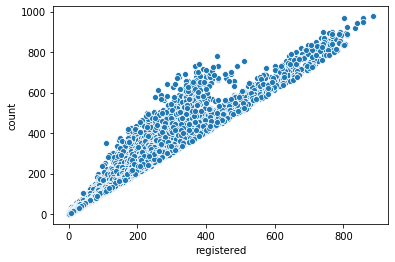

In [20]:
sns.scatterplot(x='registered', y="count", data = data)

상당한 선형 관계를 형성함

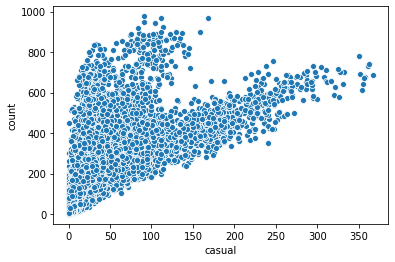

In [21]:
sns.scatterplot(x='casual', y="count", data = data)

다소 불규칙한 관계를 보임

## 평가

겨울 사용량이 큰 낙폭을 보이지 않음 ; 가설 기각